# DS Lab Assignment 4
# Polynomial Regression
# Kadali Sai Vivek
# 197139

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# loading the dataset
dataset = pd.read_csv('./Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
#dividing into dependent and independent variables
data=np.array(dataset)

x=data[:,1:-1] #Independent Variable
y=data[:,-1]   #Dependent Variable


In [5]:
#Split the data into Testing and Trainging Data
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  
    indices = np.random.permutation(len(X))       
    division = int(X.shape[0] * test_size) 

    # Divinding X and Y features into the Train and Test Set
    train_indexes = indices[division:]
    test_indexes = indices[:division]
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    y_train=y_train.reshape(y_train.shape[0],1)
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    y_test=y_test.reshape(y_test.shape[0],1)
    return X_train, y_train, X_test, y_test


# used for converting the matrix into desired form (i.e adding 1st column and x^2 ,x^3 etc)
def convertion(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  X_poly=np.vstack((np.ones((X_poly.shape[0],)),X_poly.T)).T  
  return X_poly



In [6]:
# Building the model using Training Data

import matplotlib.pyplot as plt 

def polynominal_regression(x,y,learning_rate,iterations):
    (m,cols)=x.shape
    theta = np.zeros((cols,1))
    cost_at_each_iteration=[]
    for i in range(iterations):
        dx = np.dot(x,theta)                         
        cost = (1/(2*m))*np.sum(np.square(dx - y))    
        
        d_theta = (1/m)*np.dot(x.T, dx-y)         
        theta = theta - learning_rate*d_theta 
        cost_at_each_iteration.append(cost)
        
    plt.xlabel('Number of iterations')
    plt.ylabel('J (θ)')
    plt.plot(range(iterations),cost_at_each_iteration, color = "r")
    return theta

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
Prediction : [65591.35602111089]  	| Actual : [60000]
Prediction : [600843.6028720948]  	| Actual : [500000]

MAE error is  71416.71898925204


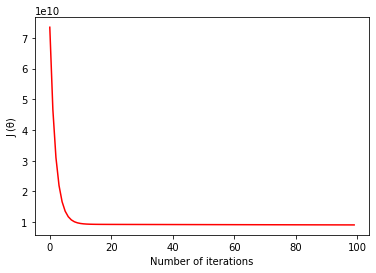

In [13]:
# predecting and evaluating for N=2

X=convertion(2,x)
print(X)
x_train, y_train, x_test, y_test = split_data(X,y,test_size=0.2)
theta=polynominal_regression(x_train,y_train,0.0001,100)

y_pred=np.dot(x_test,theta)
for i in range(y_pred.shape[0]):
    print("Prediction :",y_pred[i]," \t| Actual :",y_test[i])


import math
    
error=math.sqrt(np.mean((y_pred-y_test)**2))
print("\nMAE error is ",error)


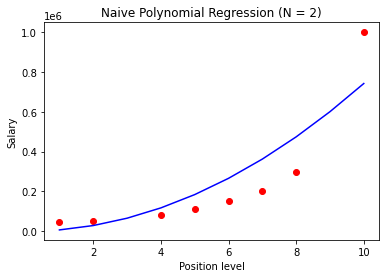

In [8]:
import matplotlib.pyplot as plt 
# Plotting the data 

plt.scatter(x_train[:,1], y_train, color = 'red')

y_pred=np.dot(X,theta)
plt.plot(X[:,1],y_pred, color = 'blue')

plt.title('Naive Polynomial Regression (N = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Prediction : [24237.699110035832]  	| Actual : [60000]
Prediction : [641852.5773430602]  	| Actual : [500000]

MAE error is  103443.45282281813


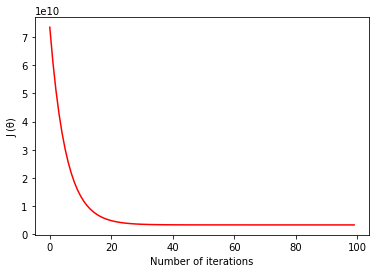

In [9]:
# for N=3 

X=convertion(3,x)
x_train, y_train, x_test, y_test = split_data(X,y,test_size=0.2)
theta=polynominal_regression(x_train,y_train,0.0000005,100)

y_pred=np.dot(x_test,theta)
for i in range(y_pred.shape[0]):
    print("Prediction :",y_pred[i]," \t| Actual :",y_test[i])



error=math.sqrt(np.mean((y_pred-y_test)**2))
print("\nMAE error is ",error)
